In [176]:
import matplotlib as plt
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
plt.rc("font",size=14)
import pandas as pd
%matplotlib inline
from sklearn import datasets,linear_model,metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)


data=pd.read_csv(r'poly.csv')
data.head()


,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [177]:
data.describe()

,araba_fiyat,araba_max_hiz
count,15.000000,15.000000
mean,598.666667,274.333333
std,838.824574,77.364321
min,60.000000,180.000000
25%,110.000000,200.000000
50%,250.000000,240.000000
75%,625.000000,355.000000
max,3000.000000,365.000000


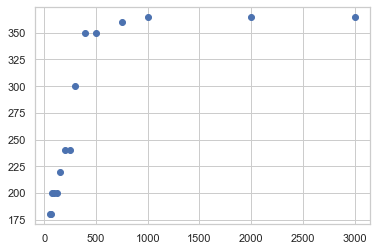

In [178]:
plt.scatter(data.araba_fiyat,data.araba_max_hiz)
plt.show()

In [179]:
#preprocessing
X=data.iloc[:,:-1].values
y=data.iloc[:,1:2].values
print(X)
print(y)


[[  60]
 [  70]
 [  80]
 [ 100]
 [ 120]
 [ 150]
 [ 200]
 [ 250]
 [ 300]
 [ 400]
 [ 500]
 [ 750]
 [1000]
 [2000]
 [3000]]
[[180]
 [180]
 [200]
 [200]
 [200]
 [220]
 [240]
 [240]
 [300]
 [350]
 [350]
 [360]
 [365]
 [365]
 [365]]


In [203]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


In [204]:
#modelbuilding

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)



In [205]:
X_train[0:5]

array([[ 150],
       [  80],
       [ 750],
       [ 100],
       [2000]], dtype=int64)

In [206]:
X_train_poly[0:5]

array([[1.000e+00, 1.500e+02, 2.250e+04],
       [1.000e+00, 8.000e+01, 6.400e+03],
       [1.000e+00, 7.500e+02, 5.625e+05],
       [1.000e+00, 1.000e+02, 1.000e+04],
       [1.000e+00, 2.000e+03, 4.000e+06]])

In [207]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_poly,y_train)

y_pred = regressor.predict(X_test_poly)


In [208]:
y_pred

array([[370.05707957],
       [242.17302228],
       [211.66496344],
       [299.39437903],
       [225.03632053]])

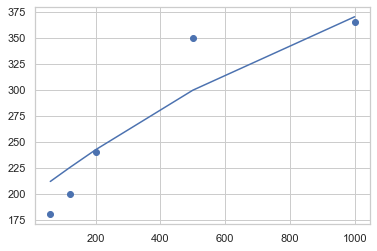

In [210]:
plt.scatter(X_test,y_test)
plt.plot(sorted(X_test),sorted(y_pred))
plt.show()

In [213]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,r2_score
ex_variance_score = explained_variance_score(y_test,y_pred)
m_absolute_error = mean_absolute_error(y_test,y_pred)
m_squared_error = mean_squared_error(y_test,y_pred)
r_2_score  = r2_score(y_test,y_pred)
print('variance score',ex_variance_score)
print('mean error',m_absolute_error)
print('sqaured error',m_squared_error)
print('r2 score',r_2_score)






variance score 0.8570629437723747
mean error 22.907401356307275
sqaured error 844.1424416218324
r2 score 0.8558499928924467
